In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")

m = 1.9044117647078551 s
c = 0.055882352939113145 s
omega0 = 3.2992787713341256 rad/s


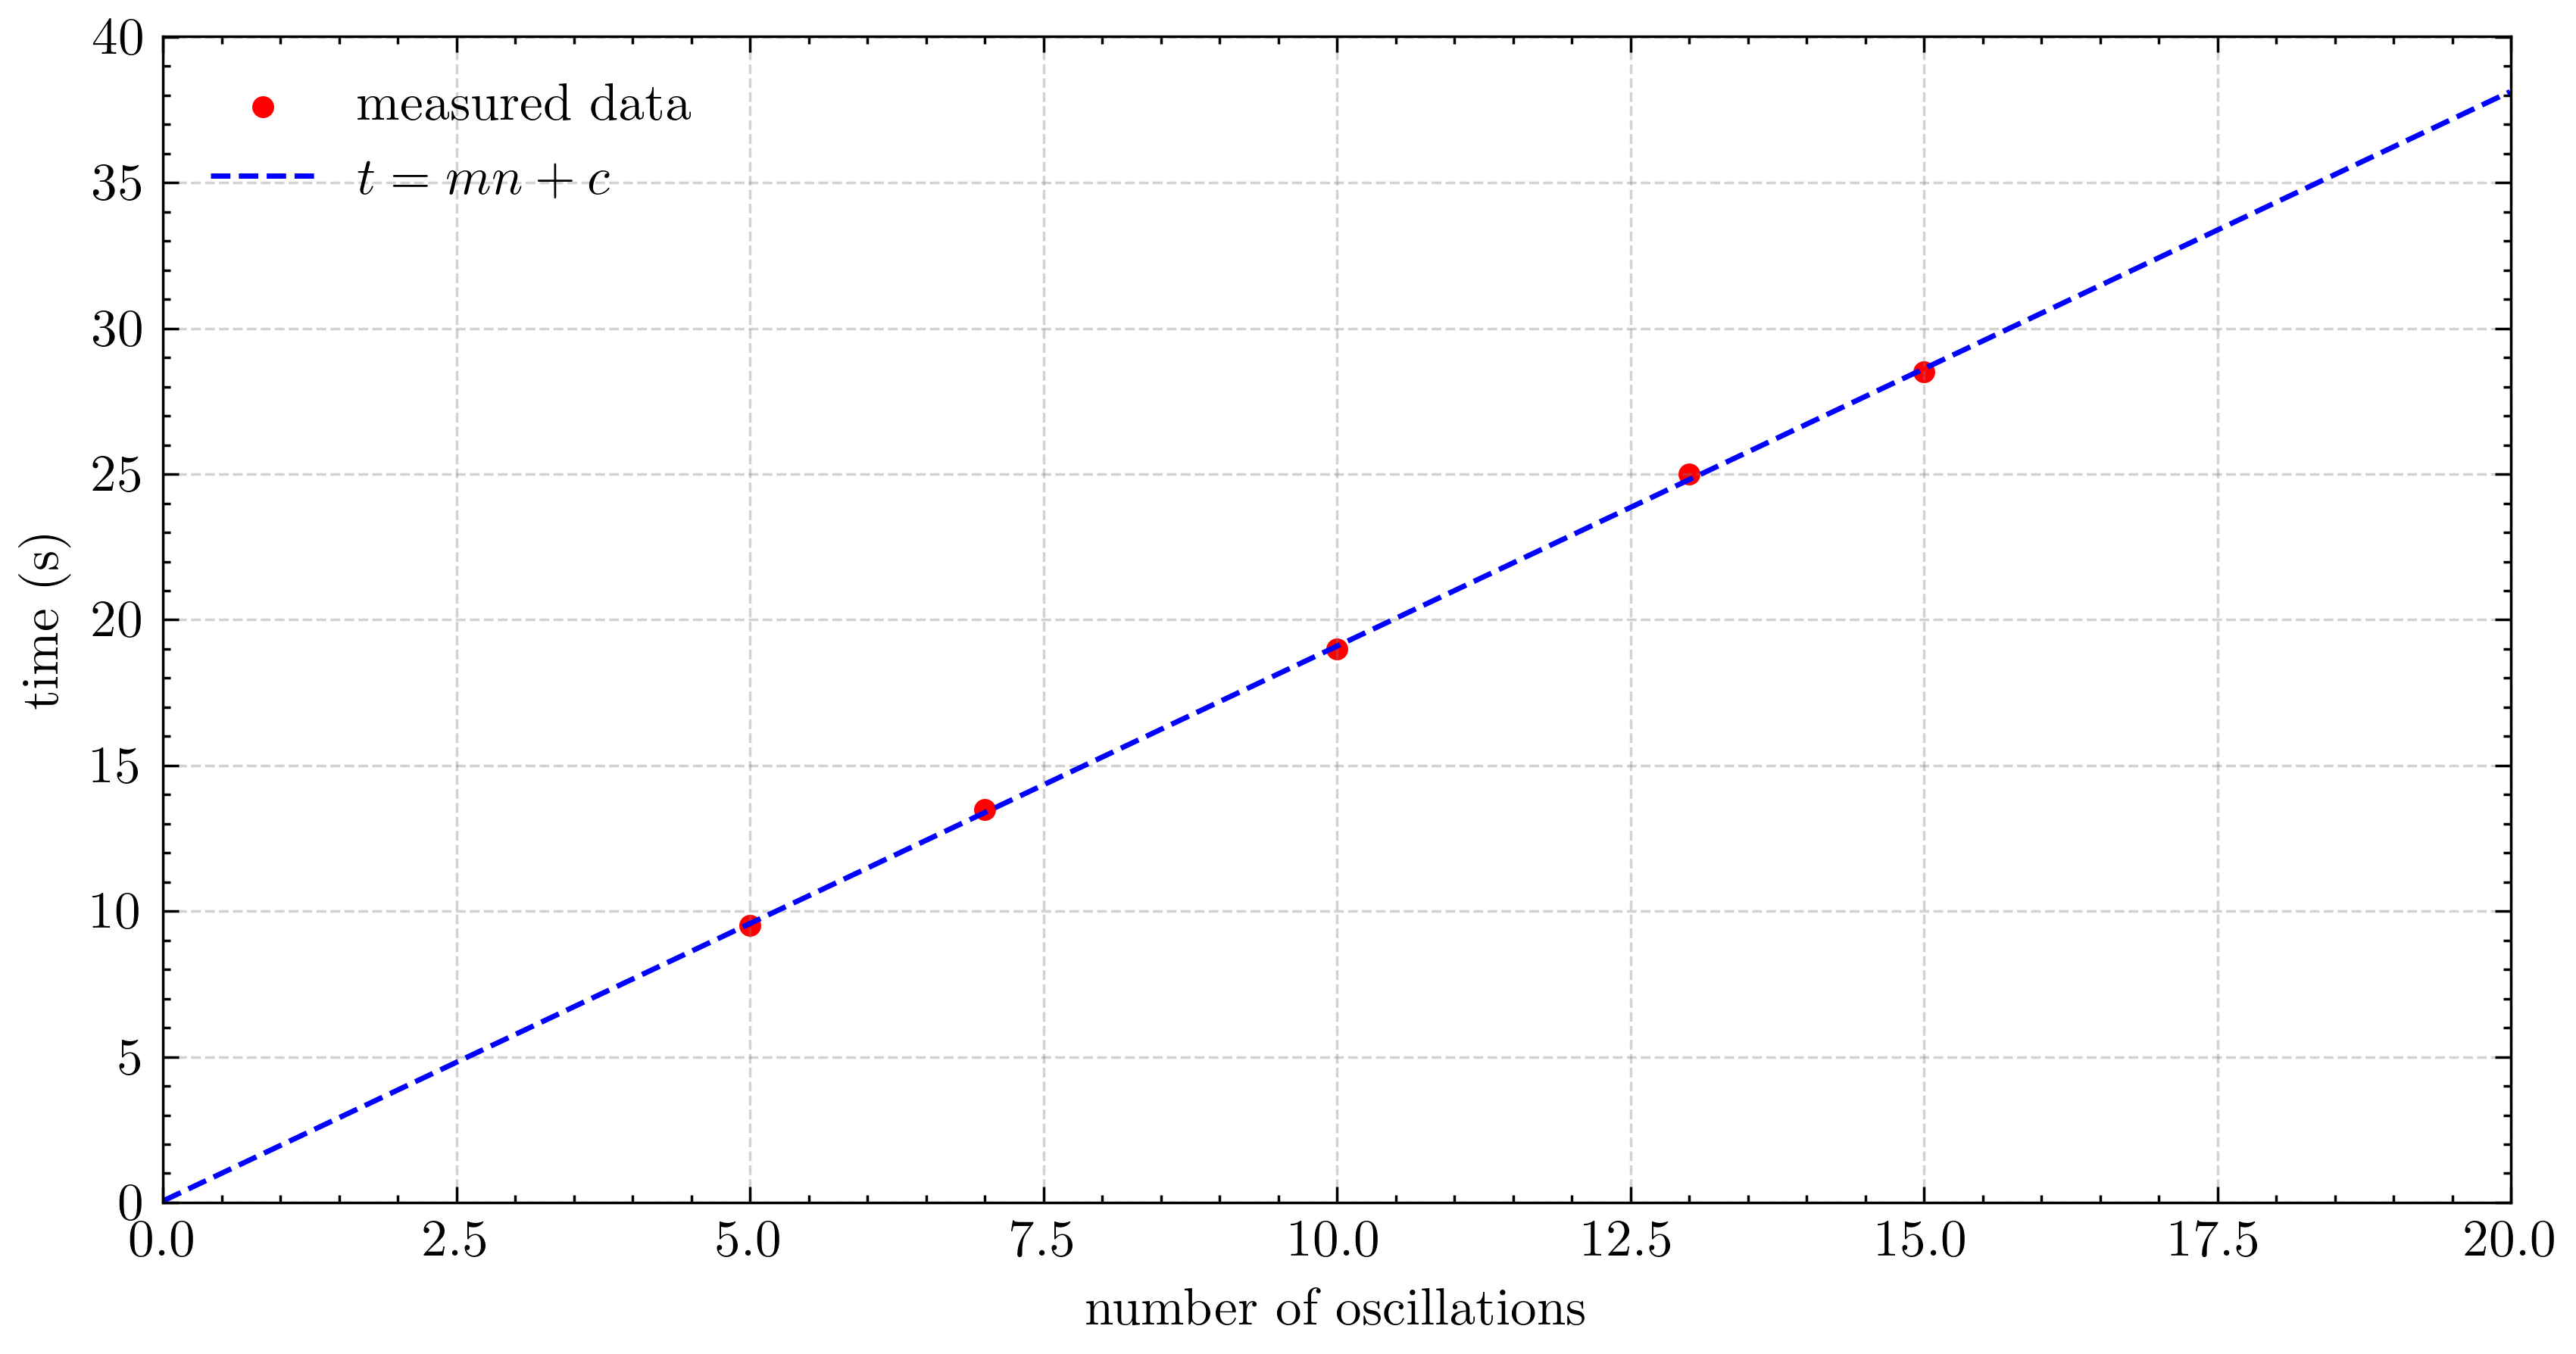

In [2]:
def straight_line(n, m, c):
    return m*n + c

data_undamped = np.loadtxt("undamped", unpack=True)

nData = data_undamped[0]
timeData = data_undamped[1]

popt, pcov = curve_fit(straight_line, nData, timeData)

print("m =", popt[0], "s")
print("c =", popt[1], "s")
print('omega0 =', 2*np.pi/popt[0], "rad/s")

n = data_undamped[0]
time = data_undamped[1]

plt.figure(dpi=500, figsize=(8, 4))
plt.grid(axis="both", c="grey", ls="--", alpha=0.35)
plt.scatter(n, time, label="measured data", c="r", s=10)
plt.plot(np.arange(0, 20, 0.01), straight_line(np.arange(0, 20, 0.01), *popt), 'b--', label=r"$t = m n + c$")
plt.xlabel("number of oscillations")
plt.ylabel("time (s)")
plt.legend()
plt.xlim(0, 20)
plt.ylim(0, )
plt.show()

A = 10.232166433609374
gamma = 0.07303590375167196 1/s
omega = 3.313659677127829 rad/s
phi = 11.855811629913084 rad


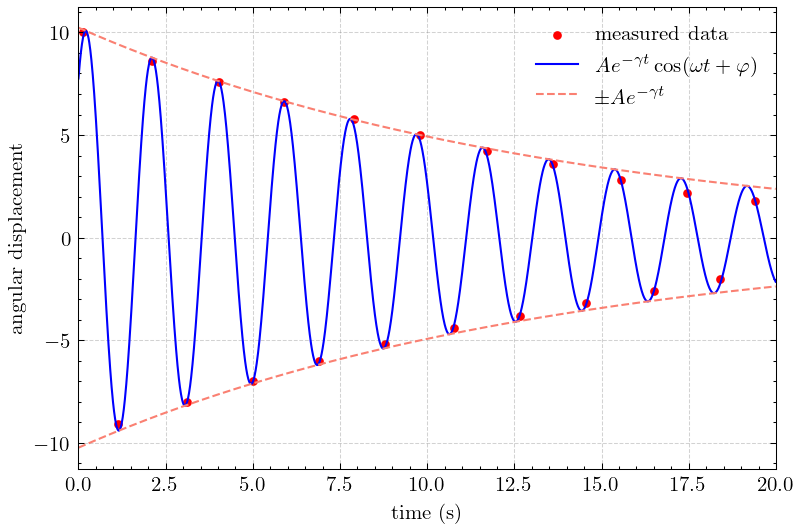

In [3]:
def func(t, A, gamma, omega, phi):
    return A * np.exp(-gamma * t) * np.cos(omega * t + phi)

data0 = np.loadtxt("0.25A", unpack=True, delimiter="\t")

tData = data0[0]
yData = data0[1]

popt, pcov = curve_fit(func, tData, yData, bounds=(0, [20,20,5,20]))

print("A =", popt[0])
print("gamma =", popt[1], "1/s")
print("omega =", popt[2], "rad/s")
print("phi =", popt[3], "rad")

plt.figure(dpi=150, figsize=(6,4))
plt.grid(axis="both", c="grey", ls="--", alpha=0.35)
plt.scatter(tData, yData, label="measured data", c='r', s=10)
plt.plot(np.arange(0, 20, 0.01), func(np.arange(0, 20, 0.01), *popt), "b-", label=r"$Ae^{-\gamma t}\cos(\omega t + \varphi)$")
plt.plot(np.arange(0, 20, 0.01), popt[0]*np.exp(-popt[1]*np.arange(0, 20, 0.01)), "salmon", ls="--", label=r"$\pm Ae^{-\gamma t}$")
plt.plot(np.arange(0, 20, 0.01), -popt[0]*np.exp(-popt[1]*np.arange(0, 20, 0.01)), "salmon", ls="--")
plt.xlim(0, 20)
plt.xlabel("time (s)")
plt.ylabel("angular displacement")
plt.legend()
plt.show()

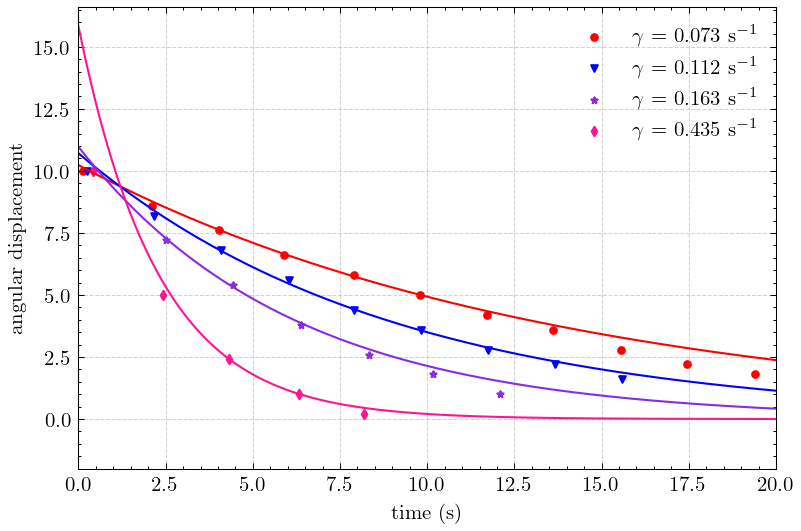

In [4]:
def func(t, A, gamma, omega, phi):
    return A * np.exp(-gamma * t) * np.cos(omega * t + phi)

data025 = np.loadtxt("0.25A", unpack=True, delimiter="\t")
data040 = np.loadtxt("0.40A", unpack=True, delimiter="\t")
data055 = np.loadtxt("0.55A", unpack=True, delimiter="\t")
data090 = np.loadtxt("0.90A", unpack=True, delimiter="\t")

tData25 = data025[0]
yData25 = data025[1]
tData40 = data040[0]
yData40 = data040[1]
tData55 = data055[0]
yData55 = data055[1]
tData90 = data090[0]
yData90 = data090[1]

popt25, pcov25 = curve_fit(func, tData25, yData25, bounds=(0, [20,20,5,20]))
popt40, pcov40 = curve_fit(func, tData40, yData40, bounds=(0, [20,20,5,20]))
popt55, pcov55 = curve_fit(func, tData55, yData55, bounds=(0, [20,20,5,20]))
popt90, pcov90 = curve_fit(func, tData90, yData90, bounds=(0, [20,20,5,20]))

""" print("A =", popt[0])
print("gamma =", popt[1], "1/s")
print("omega =", popt[2], "rad/s")
print("phi =", popt[3], "rad") """

plt.figure(dpi=150, figsize=(6,4))
plt.grid(axis="both", c="grey", ls="--", alpha=0.35)

plt.scatter(tData25[::2], yData25[::2], c='red', s=10, marker="o", label=r"$\gamma$ = " + str(round(popt25[1],3)) + r" s$^{-1}$")
plt.plot(np.arange(0, 20, 0.01), popt25[0]*np.exp(-popt25[1]*np.arange(0, 20, 0.01)), "red", ls="-")
plt.scatter(tData40[::2], yData40[::2], c='blue', s=10, marker="v", label=r"$\gamma$ = " + str(round(popt40[1],3)) + r" s$^{-1}$")
plt.plot(np.arange(0, 20, 0.01), popt40[0]*np.exp(-popt40[1]*np.arange(0, 20, 0.01)), c="blue", ls="-")
plt.scatter(tData55[::2], yData55[::2], c='blueviolet', s=10, marker="*", label=r"$\gamma$ = " + str(round(popt55[1],3)) + r" s$^{-1}$")
plt.plot(np.arange(0, 20, 0.01), popt55[0]*np.exp(-popt55[1]*np.arange(0, 20, 0.01)), c="blueviolet", ls="-")
plt.scatter(tData90[::2], yData90[::2], c='deeppink', s=10, marker="d", label=r"$\gamma$ = " + str(round(popt90[1],3)) + r" s$^{-1}$")
plt.plot(np.arange(0, 20, 0.01), popt90[0]*np.exp(-popt90[1]*np.arange(0, 20, 0.01)), c="deeppink", ls="-")

plt.xlim(0, 20)
plt.ylim(-2, )
plt.xlabel("time (s)")
plt.ylabel("angular displacement")
plt.legend()
plt.show()

omega0 = 3.248414
f = 4.037946
omega0 = 3.263848
f = 3.680810
omega0 = 3.286560
f = 2.993306
omega0 = 3.272462
f = 2.839458
omega0 = 3.236543
f = 2.449915


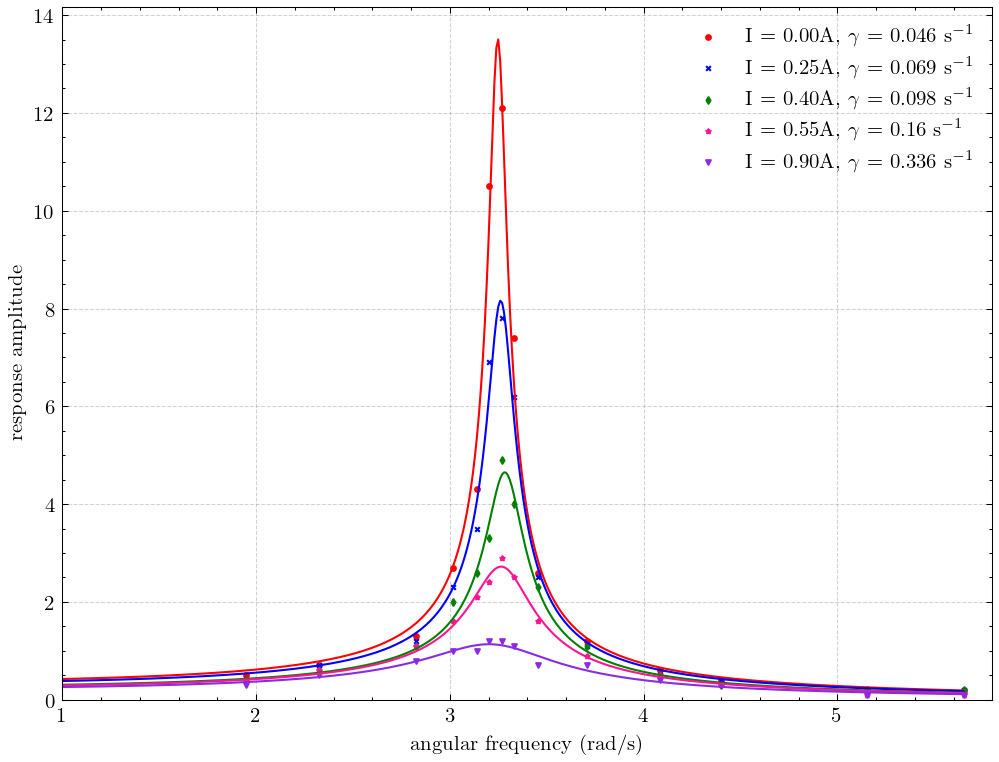

In [9]:
data1 = np.loadtxt("forced_0.55A", unpack=True)

data000 = np.loadtxt("forced_0.00A", unpack=True)
data025 = np.loadtxt("forced_0.25A", unpack=True)
data040 = np.loadtxt("forced_0.40A", unpack=True)
data055 = np.loadtxt("forced_0.55A", unpack=True)
data090 = np.loadtxt("forced_0.90A", unpack=True)

def amplitude(omega, F, gamma, omega0):
    return F/np.sqrt((omega0**2-omega**2)**2 + 4*(gamma**2)*(omega**2))

freqData000 = data000[0]
omegaData000 = freqData000*2*np.pi
ampData000 = data000[1]
popt000, pcov000 = curve_fit(amplitude, omegaData000, ampData000, bounds=(0, [10, 10, 10]))
print(f"omega0 = {popt000[2]:.6f}")
print(f"f = {popt000[0]:.6f}")

freqData025 = data025[0]
omegaData025 = freqData025*2*np.pi
ampData025 = data025[1]
popt025, pcov025 = curve_fit(amplitude, omegaData025, ampData025, bounds=(0, [10, 10, 10]))
print(f"omega0 = {popt025[2]:.6f}")
print(f"f = {popt025[0]:.6f}")

freqData040 = data040[0]
omegaData040 = freqData040*2*np.pi
ampData040 = data040[1]
popt040, pcov040 = curve_fit(amplitude, omegaData040, ampData040, bounds=(0, [10, 10, 10]))
print(f"omega0 = {popt040[2]:.6f}")
print(f"f = {popt040[0]:.6f}")

freqData055 = data055[0]
omegaData055 = freqData055*2*np.pi
ampData055 = data055[1]
popt055, pcov055 = curve_fit(amplitude, omegaData055, ampData055, bounds=(0, [10, 10, 10]))
print(f"omega0 = {popt055[2]:.6f}")
print(f"f = {popt055[0]:.6f}")

freqData090 = data090[0]
omegaData090 = freqData090*2*np.pi
ampData090 = data090[1]
popt090, pcov090 = curve_fit(amplitude, omegaData090, ampData090, bounds=(0, [10, 10, 10]))
print(f"omega0 = {popt090[2]:.6f}")
print(f"f = {popt090[0]:.6f}")

""" print("F =", popt[0])
print("gamma =", popt[1], "1/s")
print("omega0 =", popt[2], "rad/s") """

plt.figure(dpi=150, figsize=(8, 6))
plt.grid(axis="both", c="grey", ls="--", alpha=0.35)

plt.scatter(omegaData000, ampData000, c="r", s=5, marker="o", label=r"I = 0.00A, $\gamma$ = " + str(round(popt000[1],3)) + r" s$^{-1}$")
plt.plot(np.arange(0, max(omegaData000), 0.01), amplitude(np.arange(0, max(omegaData000), 0.01), *popt000), "r-")

plt.scatter(omegaData025, ampData025, c="b", s=5, marker="x", label=r"I = 0.25A, $\gamma$ = " + str(round(popt025[1],3)) + r" s$^{-1}$")
plt.plot(np.arange(0, max(omegaData025), 0.01), amplitude(np.arange(0, max(omegaData025), 0.01), *popt025), "b-")

plt.scatter(omegaData040, ampData040, c="g", s=5, marker="d", label=r"I = 0.40A, $\gamma$ = " + str(round(popt040[1],3)) + r" s$^{-1}$")
plt.plot(np.arange(0, max(omegaData040), 0.01), amplitude(np.arange(0, max(omegaData040), 0.01), *popt040), "g-")

plt.scatter(omegaData055, ampData055, c="deeppink", s=5, marker="*", label=r"I = 0.55A, $\gamma$ = " + str(round(popt055[1],3)) + r" s$^{-1}$")
plt.plot(np.arange(0, max(omegaData055), 0.01), amplitude(np.arange(0, max(omegaData055), 0.01), *popt055), c="deeppink", ls="-")

plt.scatter(omegaData090, ampData090, c="blueviolet", s=5, marker="v", label=r"I = 0.90A, $\gamma$ = " + str(round(popt090[1],3)) + r" s$^{-1}$")
plt.plot(np.arange(0, max(omegaData090), 0.01), amplitude(np.arange(0, max(omegaData090), 0.01), *popt090), c="blueviolet", ls="-")

plt.xlabel("angular frequency (rad/s)")
plt.ylabel("response amplitude")
plt.xlim(1, 5.8)
plt.ylim(0, )
plt.legend(loc="best")
plt.show()

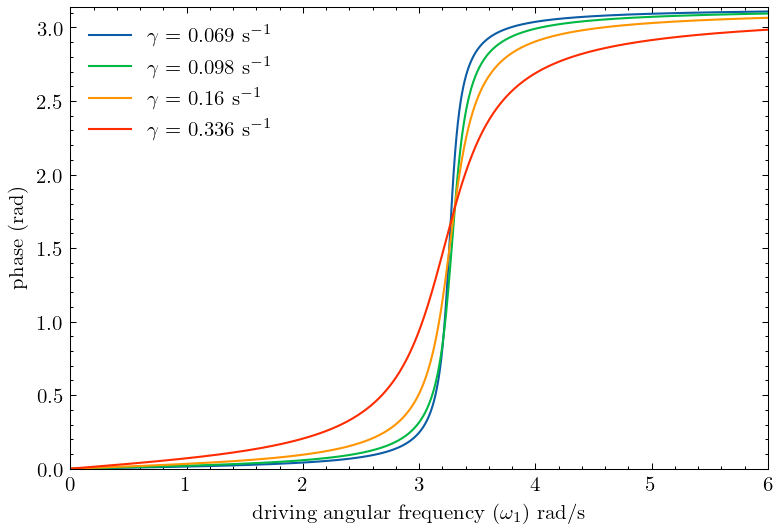

In [6]:
gamma025 = popt025[1]
omegaRes025 = popt025[2]
omegaData025 = np.linspace(0, 6, 1000)
phaseData025 = np.empty(len(omegaData025))
for n in range(len(phaseData025)):
    if np.sign(omegaRes025 - omegaData025[n]) > 0:
        phaseData025[n] = np.arctan(2*gamma025*omegaData025[n]/(omegaRes025**2 - omegaData025[n]**2))
    else:
        phaseData025[n] = np.arctan(2*gamma025*omegaData025[n]/(omegaRes025**2 - omegaData025[n]**2)) + np.pi

gamma040 = popt040[1]
omegaRes040 = popt040[2]
omegaData040 = np.linspace(0, 6, 1000)
phaseData040 = np.empty(len(omegaData040))
for n in range(len(phaseData040)):
    if np.sign(omegaRes040 - omegaData040[n]) > 0:
        phaseData040[n] = np.arctan(2*gamma040*omegaData040[n]/(omegaRes040**2 - omegaData040[n]**2))
    else:
        phaseData040[n] = np.arctan(2*gamma040*omegaData040[n]/(omegaRes040**2 - omegaData040[n]**2)) + np.pi

gamma055 = popt055[1]
omegaRes055 = popt055[2]
omegaData055 = np.linspace(0, 6, 1000)
phaseData055 = np.empty(len(omegaData055))
for n in range(len(phaseData055)):
    if np.sign(omegaRes055 - omegaData055[n]) > 0:
        phaseData055[n] = np.arctan(2*gamma055*omegaData055[n]/(omegaRes055**2 - omegaData055[n]**2))
    else:
        phaseData055[n] = np.arctan(2*gamma055*omegaData055[n]/(omegaRes055**2 - omegaData055[n]**2)) + np.pi

gamma090 = popt090[1]
omegaRes090 = popt090[2]
omegaData090 = np.linspace(0, 6, 1000)
phaseData090 = np.empty(len(omegaData090))
for n in range(len(phaseData090)):
    if np.sign(omegaRes090 - omegaData090[n]) > 0:
        phaseData090[n] = np.arctan(2*gamma090*omegaData090[n]/(omegaRes090**2 - omegaData090[n]**2))
    else:
        phaseData090[n] = np.arctan(2*gamma090*omegaData090[n]/(omegaRes090**2 - omegaData090[n]**2)) + np.pi

plt.figure(dpi=150, figsize=(6,4))

plt.plot(omegaData025, phaseData025, label=r"$\gamma =$ " + str(round(gamma025,3)) + r" s$^{-1}$")
plt.plot(omegaData040, phaseData040, label=r"$\gamma =$ " + str(round(gamma040,3)) + r" s$^{-1}$")
plt.plot(omegaData055, phaseData055, label=r"$\gamma =$ " + str(round(gamma055,3)) + r" s$^{-1}$")
plt.plot(omegaData090, phaseData090, label=r"$\gamma =$ " + str(round(gamma090,3)) + r" s$^{-1}$")

plt.xlabel(r"driving angular frequency $(\omega_1)$ rad/s")
plt.ylabel(r"phase (rad)")
plt.xlim(0, 6)
plt.ylim(0, np.pi)
plt.legend()
plt.show()